In [6]:
# ===== FIRST CELL =====
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["LOKY_MAX_CPU_COUNT"] = "1"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
file_path = r"D:\Shreya DA Projects\Customer Segmentation Analysis [L1] P2\customers.csv"
df = pd.read_csv(file_path)


In [14]:
features = [
    'Income',
    'Age',
    'Recency',
    'MntTotal',
    'NumWebPurchases',
    'NumStorePurchases',
    'NumDealsPurchases'
]

X = df[features].fillna(df[features].median())


In [15]:
# Scaling (THIS CREATES X_scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

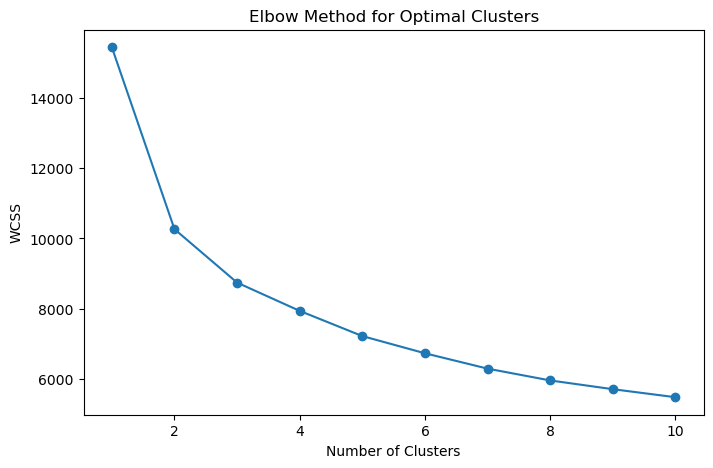

In [17]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
        algorithm="lloyd"
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
# ===== FOURTH CELL =====
# KMeans clustering
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=10,
    algorithm="lloyd"
)

df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,3
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,0
